In [1]:
subscription_key = '6d1691bf159940679209d2d734d2e2e0'
assert subscription_key

In [2]:
face_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/detect'

In [3]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [10]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

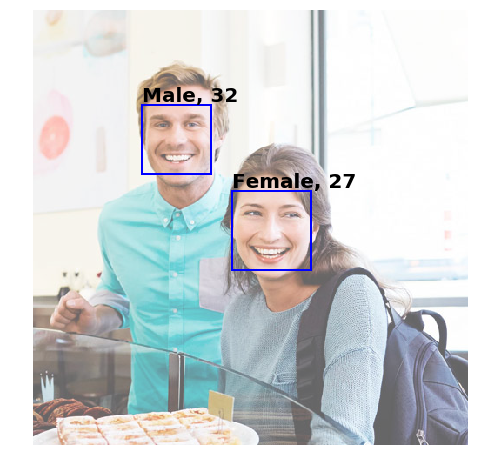

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [12]:
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    print(fr)
    print(fa)

{'top': 208, 'left': 228, 'width': 91, 'height': 91}
{'smile': 1.0, 'headPose': {'pitch': 0.0, 'roll': 4.3, 'yaw': -0.3}, 'gender': 'female', 'age': 27.0, 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.65}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': True, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.06, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 1.0}, {'color': 'blond', 'confidence': 0.5}, {'color': 'black', 'confidence': 0.34}, {'color': 'red', 'confidence': 0.32}, {'color': 'gray', 'confidence': 0.14}, {'color': 'other', 'confidence': 0.03}]}}
{'top': 109,

In [7]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

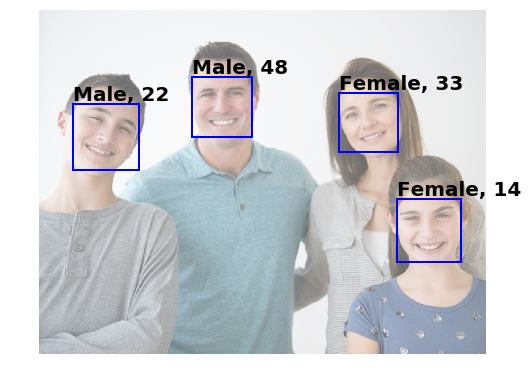

In [8]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")

In [9]:
fa["glasses"]

'NoGlasses'